In [2]:
require(factoextra)

Loading required package: factoextra
Loading required package: ggplot2


In [3]:
library(NbClust)

In [4]:
library('TSclust')

Loading required package: wmtsa
Loading required package: pdc
Loading required package: cluster


In [5]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [6]:
sept_perc = sept_ts()
june_perc = june_ts()

 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1] 408 409 410 411 412 413 414 415 476 477 478 479 485 486 721 722 723 724 725
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [7]:
sept_days = split_by_day(sept_perc)
colnames(sept_days) = c(1:28)

In [8]:
june_days = split_by_day(june_perc)
colnames(june_days) = c(102:129)

In [9]:
combined = cbind(june_days, sept_days)

In [10]:
normed_combined = data.frame(apply(combined, 2, normalize))

In [11]:
colnames(normed_combined) =c(c(1:28), c(102:129))

In [12]:
phase_diss = dissimilarity(as.matrix(combined), phase_dist(1))

In [10]:
days = paste(rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8), c(paste(rep('J', 28), 2:29, sep=''), paste(rep('S', 28), 1:28,sep='')),sep='')

In [191]:
weekdays = rep(c('Tu', 'W' ,'Th', 'F', 'Sa', 'Su', 'M'), 8)

Phase shift dissimilarity. Saturdays and Sundays have different phase.

In [66]:
library('fpc')

In [13]:
# weekdays = rep(c('T', 'W' ,'R', 'F', 'S', 'U', 'M'), 8)c

In [64]:
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
a=agnes(dist, diss=TRUE)

png 
  2

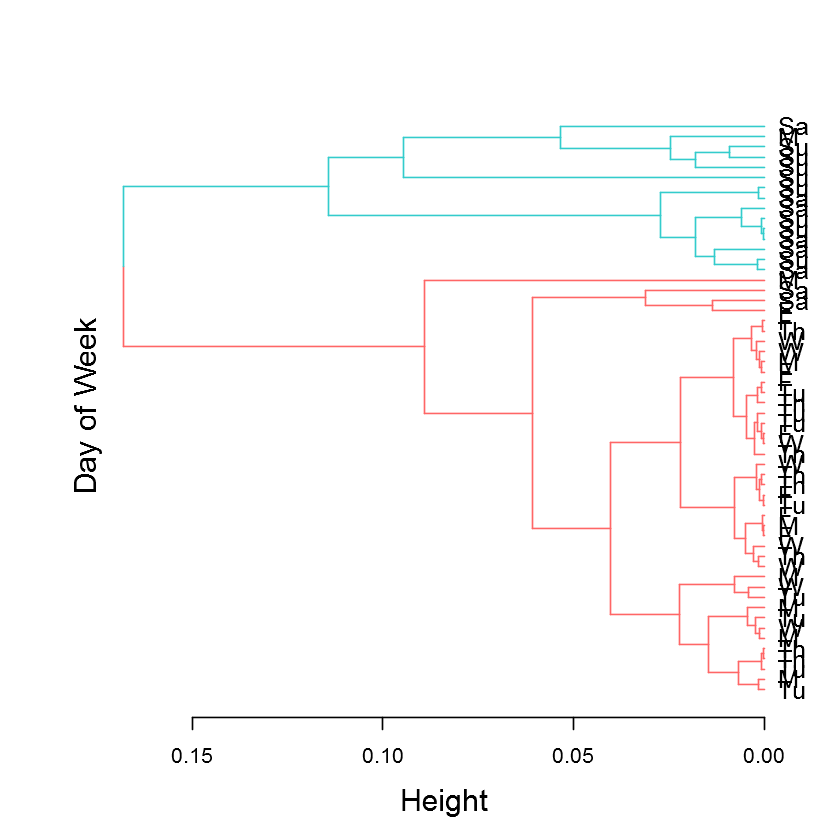

In [65]:
phase_dend <-function(){
    fviz_dend(a,  k=2, main='', k_colors=c("#ff6666", "#33cccc"), ylab='', xlab='Height', las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    mtext( text='Day of Week', side=2, cex=1.5)
}
phase_dend()
png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase_dend.png', height=1000)
phase_dend()
dev.off()

In [15]:
sil = silhouette(pam(dist, k=2, diss=TRUE))

In [169]:
install.packages("cowplot", repos='http://cran.rstudio.com/')

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'cowplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2bQjEc\downloaded_packages


png 
  2

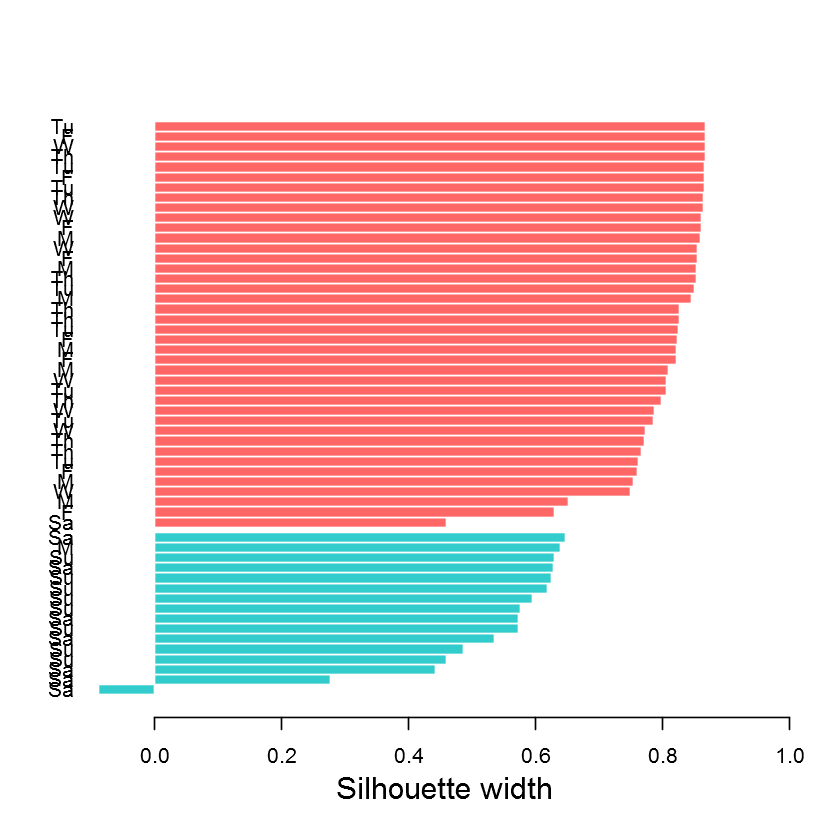

In [81]:
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
sil = silhouette(pam(dist, k=2, diss=TRUE))
# allow legend outside plot
# par(oma = c(4, 1, 1, 10))
plot(sil, col = c("#ff6666", "#33cccc"), nmax=80, main='', do.n.k=FALSE, do.clus.stat=FALSE, sub='', xlab='Silhouette width', cex.lab=1.5)
# legend(x='right', legend=c('Monday-Friday', 'Saturday, Sunday, Holidays'), xpd=TRUE)
png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase-sil.png', height=800)
plot(sil, col = c("#ff6666", "#33cccc"), nmax=80, main='', do.n.k=FALSE, do.clus.stat=FALSE, sub='',xlab='Silhouette width', cex.lab=1.5)
dev.off()


  cluster size ave.sil.width
1       1   40          0.81
2       2   16          0.51


Warning message:
: Stacking not well defined when ymin != 0

Saving 6.67 x 6.67 in image
Warning message:
: Stacking not well defined when ymin != 0

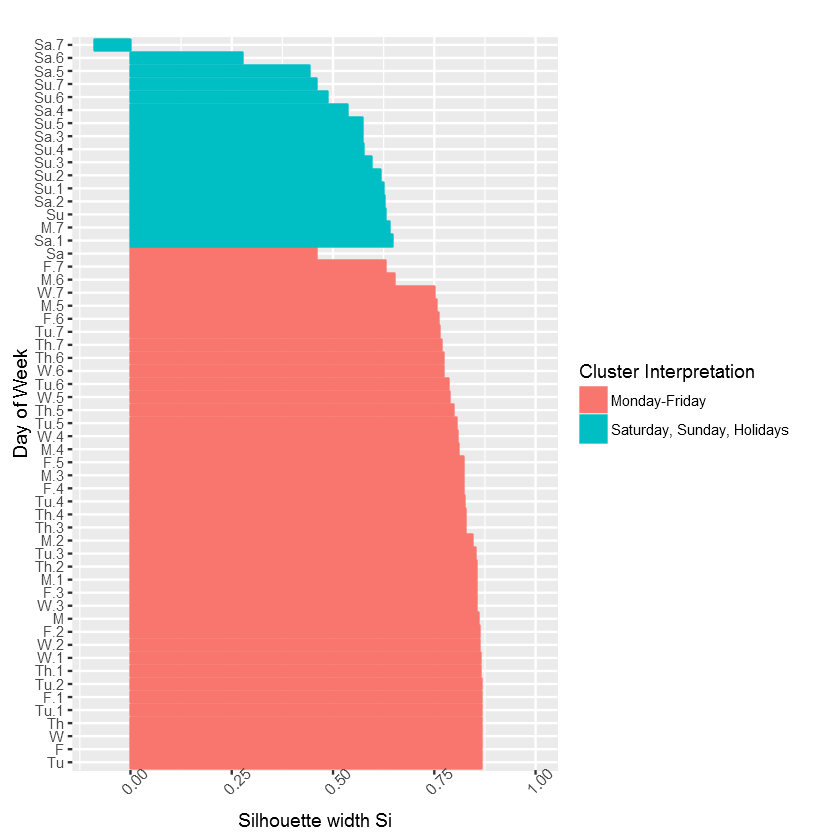

In [24]:
g = fviz_silhouette(sil, label=TRUE) + ggtitle('') + xlab('Day of Week') 
# legend, include both color and fill
g = g + scale_color_discrete(name='Cluster Interpretation', breaks=c(1,2), labels=c('Monday-Friday', 'Saturday, Sunday, Holidays'))
g = g + scale_fill_discrete(name='Cluster Interpretation', breaks=c(1,2), labels=c('Monday-Friday', 'Saturday, Sunday, Holidays'))

# flip since its longer vertically
# g = g + scale_y_reverse()
g = g + coord_flip()
# ggdraw(switch_axis_position(g, 'y'))
g
ggsave('c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase_sil.png')

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 2  1  1  1  1  1  1  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1 
 F Sa Su  M 
 1  2  2  1 


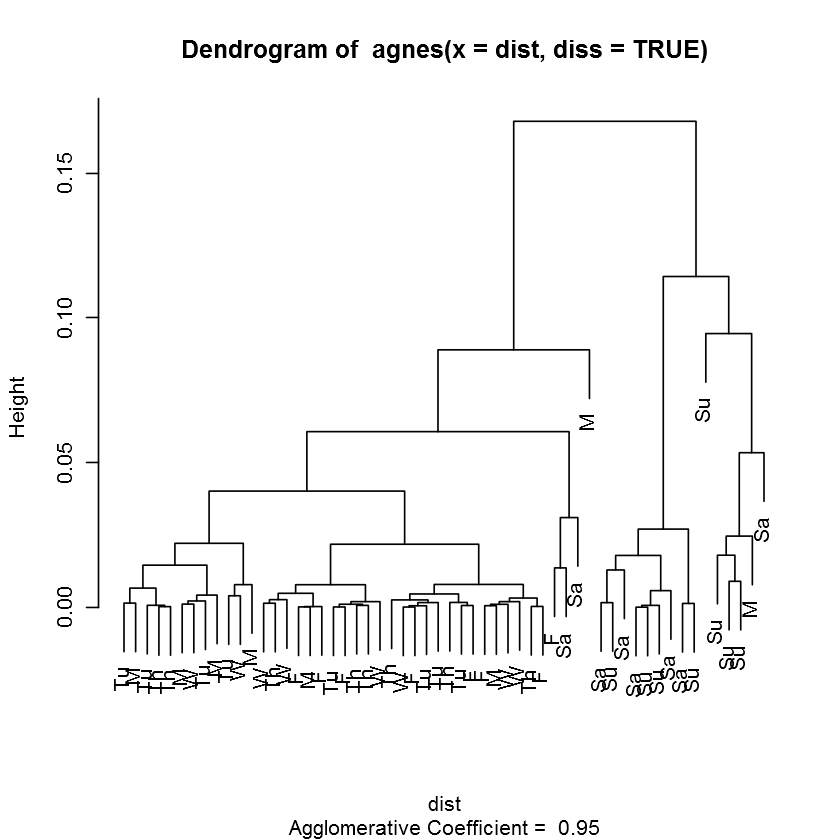

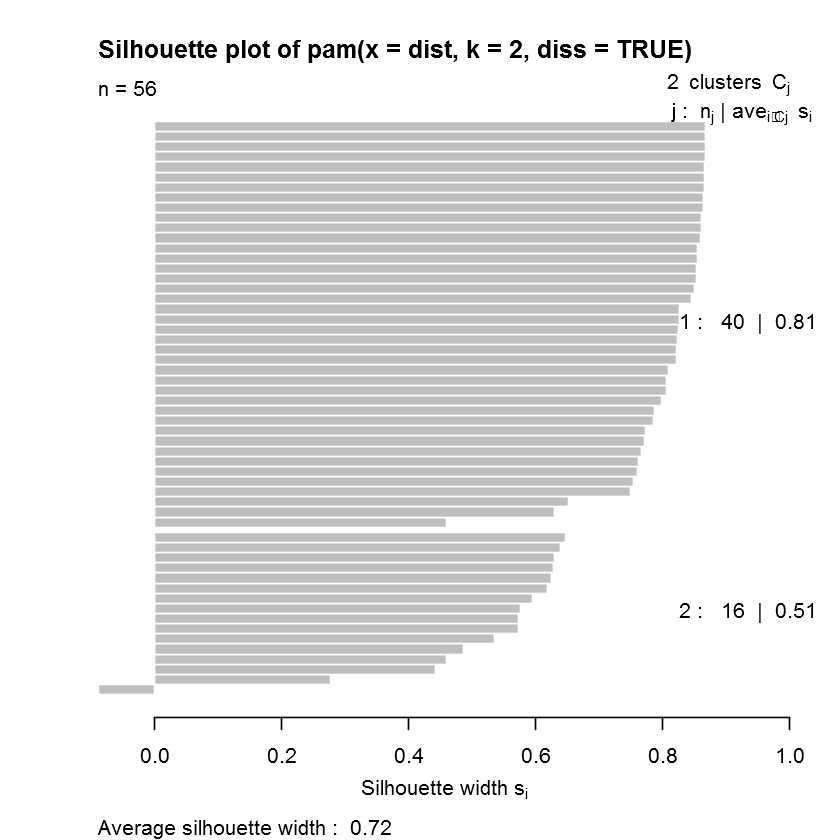

In [144]:
med=clust(dist)

In [145]:
med

Medoids:
     ID       
[1,] "46" "F" 
[2,] "41" "Su"
Clustering vector:
Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 2  1  1  1  1  1  1  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1 
 F Sa Su  M 
 1  2  2  1 
Objective function:
     build       swap 
0.03252116 0.02956686 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

In [51]:
phase_clust_plot <- function(){
dist = phase_diss
colnames(dist)=weekdays
rownames(dist)=weekdays
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/phase-clust.png')

png 
  2

In [14]:
sept.1 = as.numeric(window(sept_perc, start=c(1, 1), end= c(7, 24)))
sept.2 = as.numeric(window(sept_perc, start=c(8, 1), end= c(14, 24)))
sept.3 = as.numeric(window(sept_perc, start=c(15, 1), end= c(21, 24)))
sept.4 = as.numeric(window(sept_perc, start=c(22, 1), end= c(28, 24)))
june.1 = as.numeric(window(june_perc, start=c(1, 1), end= c(7, 24)))
june.2 = as.numeric(window(june_perc, start=c(8, 1), end= c(14, 24)))
june.3 = as.numeric(window(june_perc, start=c(15, 1), end= c(21, 24)))
june.4 = as.numeric(window(june_perc, start=c(22, 1), end= c(28, 24)))

In [15]:
weeks = data.frame(june.1, june.2, june.3, june.4, sept.1, sept.2, sept.3, sept.4)

In [18]:
dpm = dissimilarity(as.matrix(weeks), daily_phase_dist(8))
rownames(dpm) = colnames(weeks)
colnames(dpm) = colnames(weeks)

ERROR: Error: could not find function "daily_phase_dist"


Draw shaded region: http://earlh.com/blog/2009/08/11/shading-pieces-of-an-r-plot/

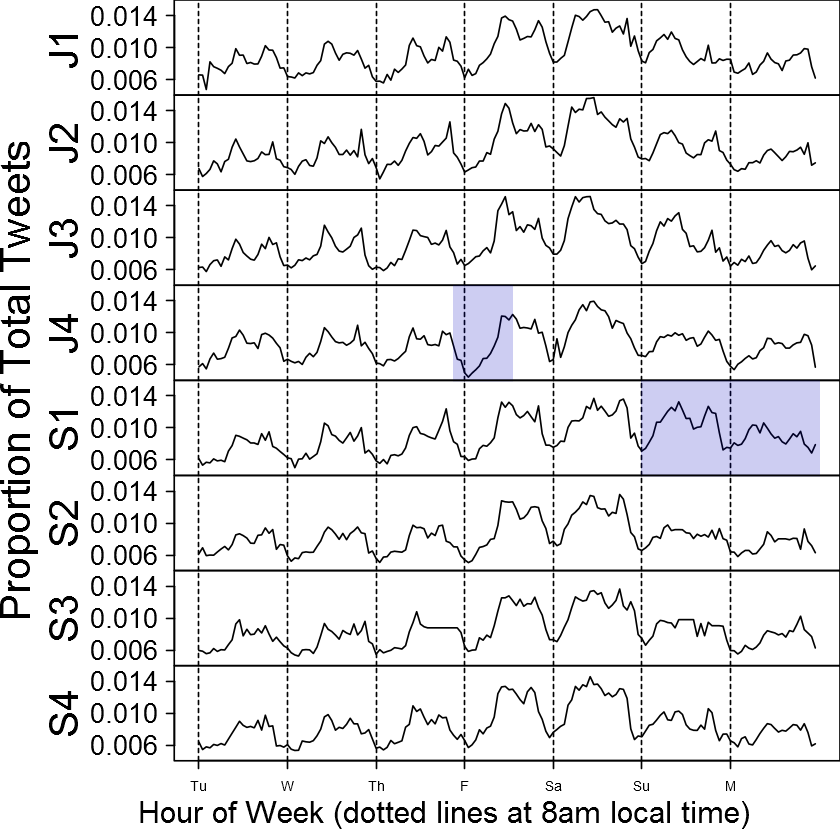

In [62]:
plot_weeks <- function(){
#     week_names = c('June 2-8', 'June 9-15', 'June 16-22', 'June 23-29', 'Sept 1-7', 'Sept 8-14', 'Sept 15-21', 'Sept 22-28')
    week_names = c('J1', 'J2', 'J3', 'J4', 'S1', 'S2', 'S3', 'S4')
par(mfrow=c(8,1))
# outer margin
par(oma = c(5, 3, 0, 0))

shade_color <- rgb(0, 0, 190, alpha=50, maxColorValue=255)
for (col in 1:8){
    # remove space for x-axis
    par(mar = c(0, 8, 0, 0))
    yrange = c(0.0045, 0.0155)
    plot(weeks[, col], type='l', xaxt='n', ylim=yrange, yaxt='n', ylab='')
    title(cex.lab =3, ylab=week_names[col], line=6)
    axis(2, labels = c('0.006', '0.010', '0.014'), at=c(0.006, 0.01, 0.014), las = 1, cex.axis=2)
    abline(v=seq(1, 168, by=24), lty=2)
    if (col==4){
        rect(xleft=70, xright=86, ybottom=(yrange[1]-0.005), ytop=(yrange[2]+0.005),col=shade_color, border=NA)
        }
    if (col==5){
        rect(xleft=(24*5+1), xright=(24*7+1), ybottom=(yrange[1]-0.005), ytop=(yrange[2]+0.005),col=shade_color, border=NA)
        }

}

mtext('Proportion of Total Tweets', cex=2, side = 2, outer = TRUE, line = 1)
mtext('Hour of Week (dotted lines at 8am local time)', cex=1.5, side = 1, outer = TRUE, line = 3)
axis(1, labels = c('Tu', 'W', 'Th', 'F', 'Sa', 'Su', 'M'), at=seq(1, 168, by=24), outer=TRUE)

    
}
plot_weeks()

In [63]:
 png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/tweets-by-week.png', height=800)
  plot_weeks()
  dev.off()

png 
  2

We look at Euc dist between days, basically comparing shape and magnitude. The dendogram is interesting, prob need more than 2 clusters, need to use silhouette.

In [31]:
install.packages('fpc', repos='http://cran.rstudio.com/')

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'modeltools', 'DEoptimR', 'mclust', 'flexmix', 'prabclus', 'diptest', 'mvtnorm', 'robustbase', 'kernlab', 'trimcluster'



package 'modeltools' successfully unpacked and MD5 sums checked
package 'DEoptimR' successfully unpacked and MD5 sums checked
package 'mclust' successfully unpacked and MD5 sums checked
package 'flexmix' successfully unpacked and MD5 sums checked
package 'prabclus' successfully unpacked and MD5 sums checked
package 'diptest' successfully unpacked and MD5 sums checked
package 'mvtnorm' successfully unpacked and MD5 sums checked
package 'robustbase' successfully unpacked and MD5 sums checked
package 'kernlab' successfully unpacked and MD5 sums checked
package 'trimcluster' successfully unpacked and MD5 sums checked
package 'fpc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2BiarR\downloaded_packages


In [48]:
a = pam(dist, k=4, diss=TRUE)

In [88]:
install.packages('NbClust', repos='http://cran.rstudio.com')

Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2BiarR\downloaded_packages


In [80]:
devtools::install_github("kassambara/factoextra")

from URL https://api.github.com/repos/kassambara/factoextra/zipball/master
Installing factoextra
Installing 1 package: abind
Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'abind' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2BiarR\downloaded_packages


Installing 1 package: dendextend
Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'dendextend' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2BiarR\downloaded_packages


Installing 1 package: ggrepel
Installing package into 'C:/Users/Tom Work/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'ggrepel' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tom Work\AppData\Local\Temp\Rtmp2BiarR\downloaded_packages


"C:/PROGRA~1/R/R-33~1.1/bin/i386/R" --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL "C:/Users/Tom  \
  Work/AppData/Local/Temp/Rtmp2BiarR/devtools1b6d066561fb9/kassambara-factoextra-495c7b3"  \
  --library="C:/Users/Tom Work/Documents/R/win-library/3.3" --install-tests 



  cluster size ave.sil.width
1       1   30          0.49
2       2    8          0.49
3       3    9          0.41
4       4    9          0.26


Warning message:
: Stacking not well defined when ymin != 0

Saving 6.67 x 6.67 in image
Warning message:
: Stacking not well defined when ymin != 0

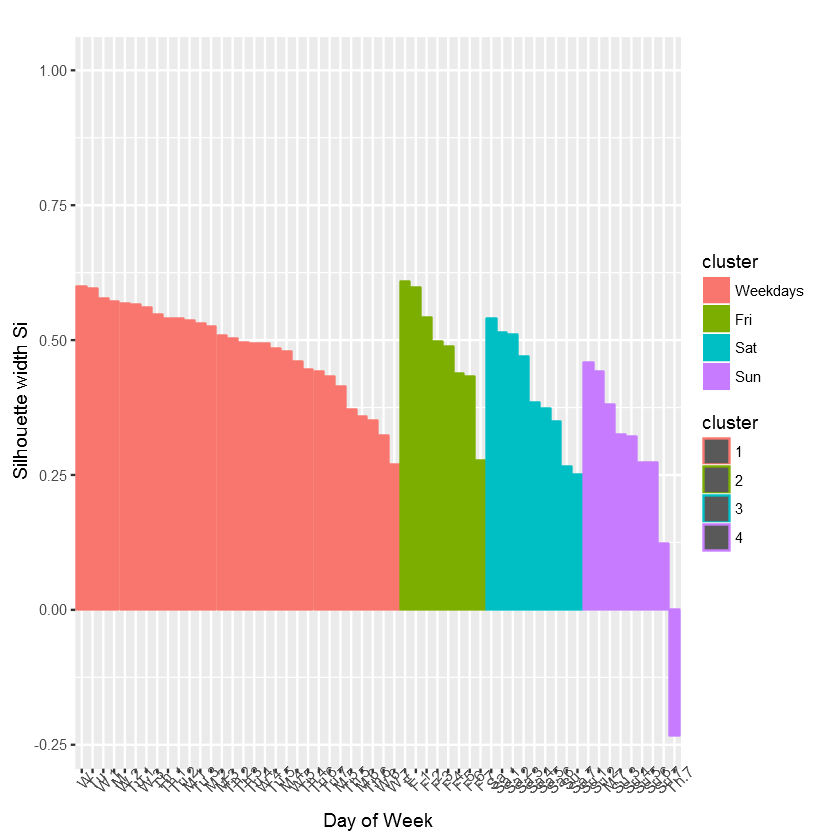

In [62]:
a = pam(dist, k=4, diss=TRUE)
sil = silhouette(a)
fviz_silhouette(sil, label=TRUE) + ggtitle('') + xlab('Day of Week') + scale_fill_discrete(breaks=c(1,2,3,4), 
                                                                        labels=c('Weekdays', 'Fri', 'Sat', 'Sun'))
ggsave('c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-sil.png')

In [60]:
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
b = agnes(dist, diss=TRUE)

png 
  2

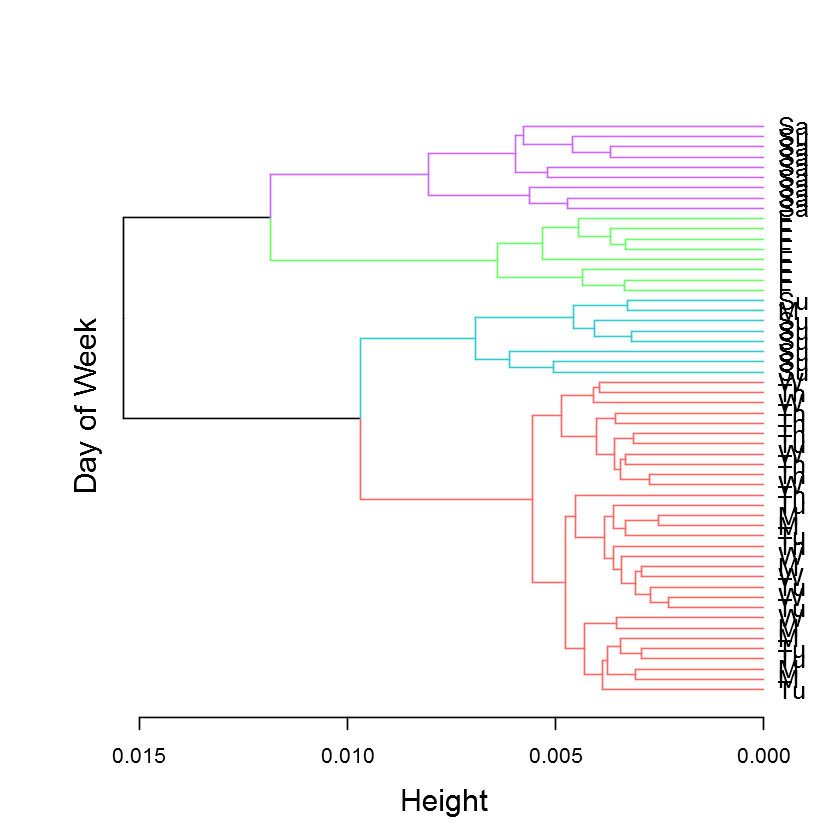

In [61]:
euc_dend <-function(){
    fviz_dend(b, rect=TRUE, k=4,k_colors=c("#ff6666", "#33cccc",'#66ff66', '#cc66ff'), main='', ylab='', xlab='Height', las=1, cex=1.2, cex.lab=1.5, horiz=TRUE)
    mtext( text='Day of Week', side=2, cex=1.5)
}
euc_dend()
png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-dend.png', height=1000)
euc_dend()
dev.off()

png 
  2

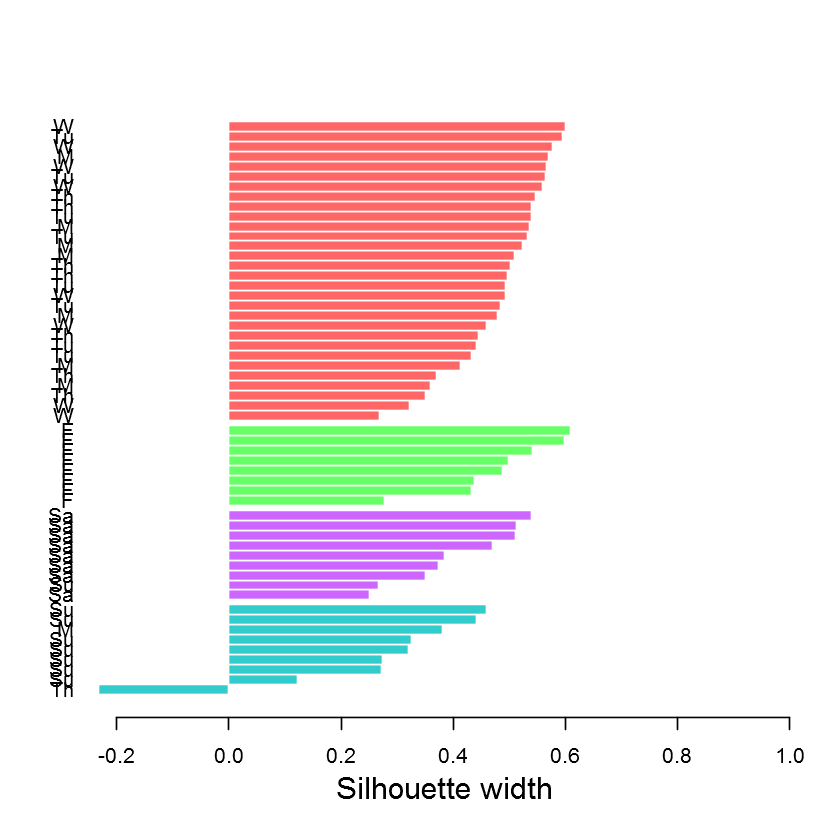

In [82]:
dist = diss(combined, METHOD='EUCL')
b = pam(dist, k=4, diss=TRUE)
sil = silhouette(b)
# allow legend outside plot
# par(oma = c(4, 1, 1, 10))
plot(sil,col=c("#ff6666", '#66ff66', '#cc66ff', "#33cccc"), nmax=80, main='', do.n.k=FALSE, do.clus.stat=FALSE, xlab='Silhouette width',sub='', cex.lab=1.5)

png(filename='c:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-sil.png', height=800)
plot(sil,col=c("#ff6666", '#66ff66', '#cc66ff', "#33cccc"), nmax=80, main='', do.n.k=FALSE, do.clus.stat=FALSE, xlab='Silhouette width',sub='', cex.lab=1.5)
dev.off()


Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  1  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


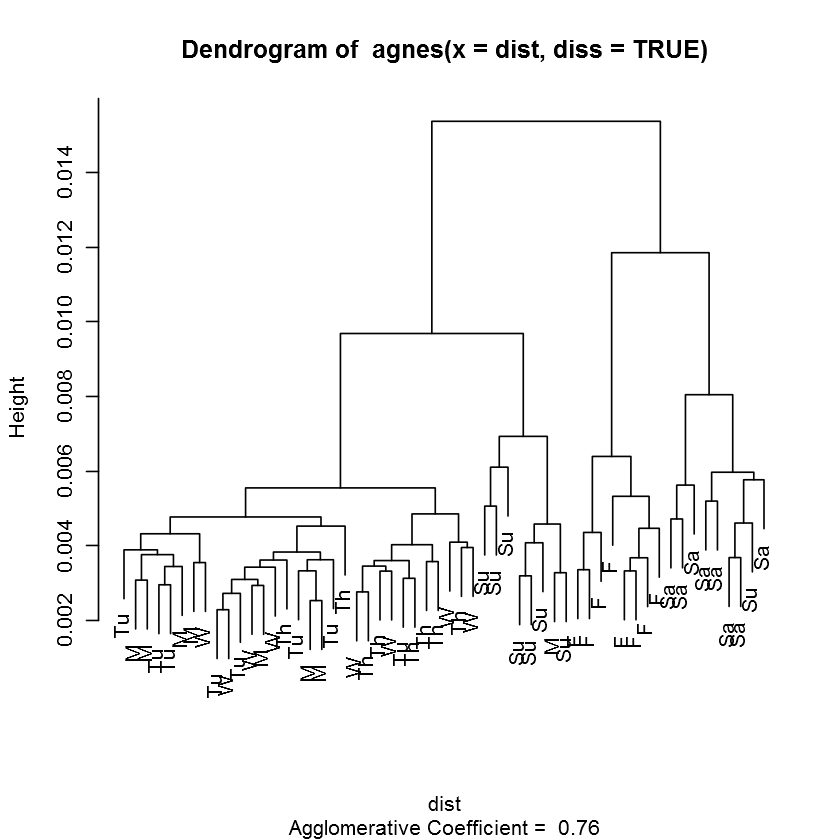

Medoids:
     ID       
[1,] "22" "Tu"
[2,] "40" "Sa"
Clustering vector:
Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  2  2  2  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  1  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 
Objective function:
      build        swap 
0.005612298 0.005612298 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

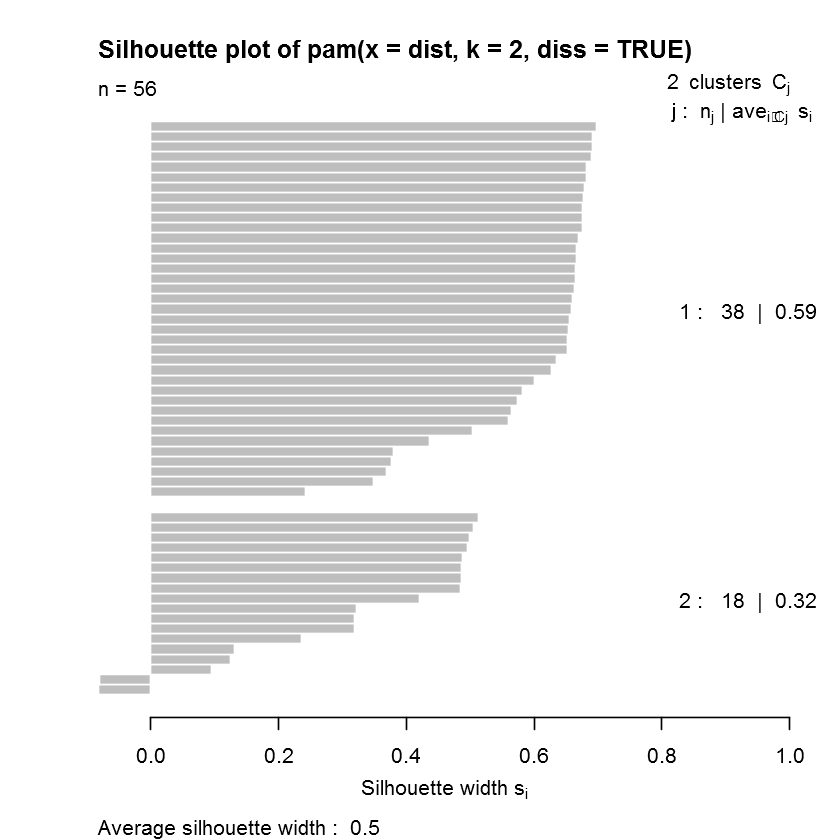

In [34]:
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
clust(dist)

In [71]:
phase_clust_plot <- function(){
colnames(combined)=weekdays
dist = diss(combined, METHOD='EUCL')
# clust(dist)
plot(agnes(dist), which.plots=2)
}
save_png(phase_clust_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/euc-day-clust.png')

png 
  2

Dynamic time warping. Seperates out Sunday/Monday/Tuesday

In [65]:
cur_sup <- function(ts){
    return (filter(ts, sides=2, rep(1,5)/5)[3:(length(ts)-2)])
}

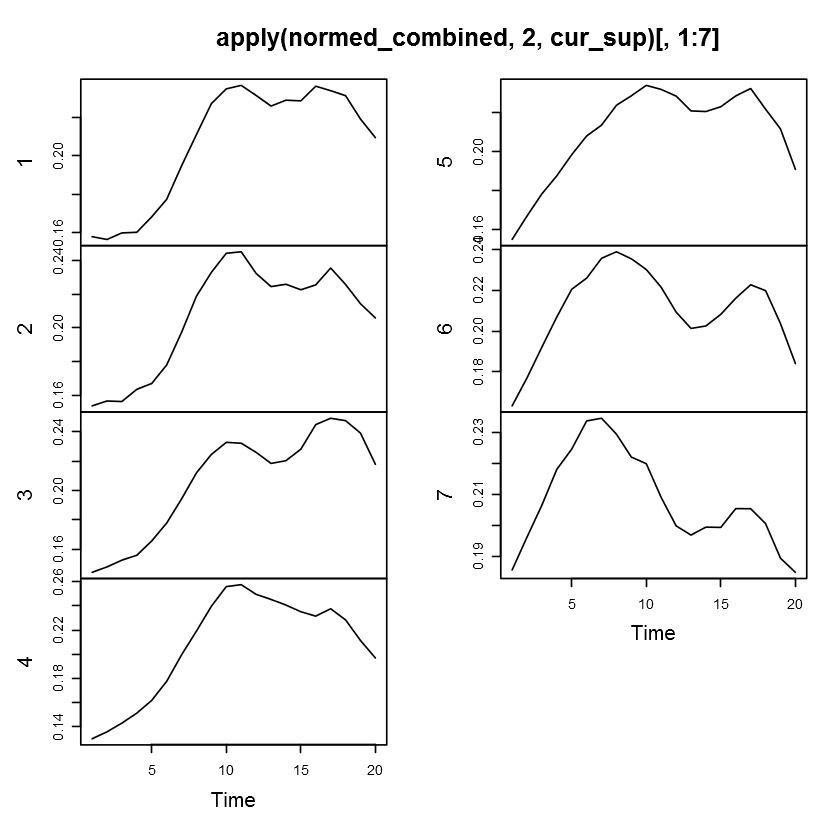

In [69]:
plot.ts(apply(normed_combined, 2, cur_sup)[,1:7])

Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa 
 1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1  1  2 
Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th  F Sa Su  M Tu  W Th 
 1  1  1  1  1  2  2  2  1  1  1  1  2  2  1  1  1  1  1  2  2  1  1  1  1  1 
 F Sa Su  M 
 2  2  1  1 


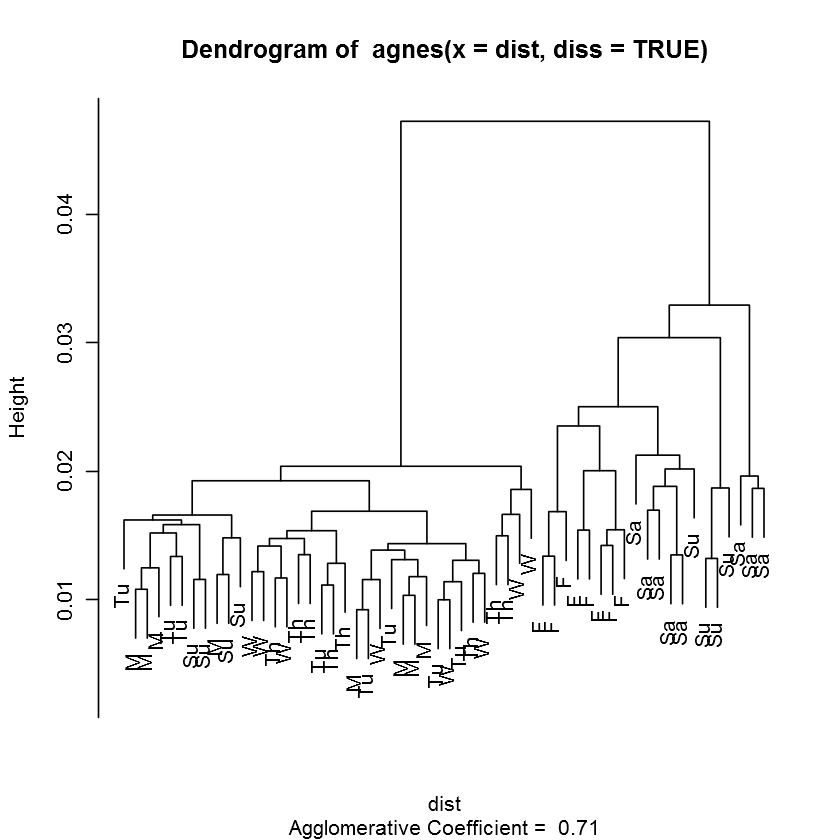

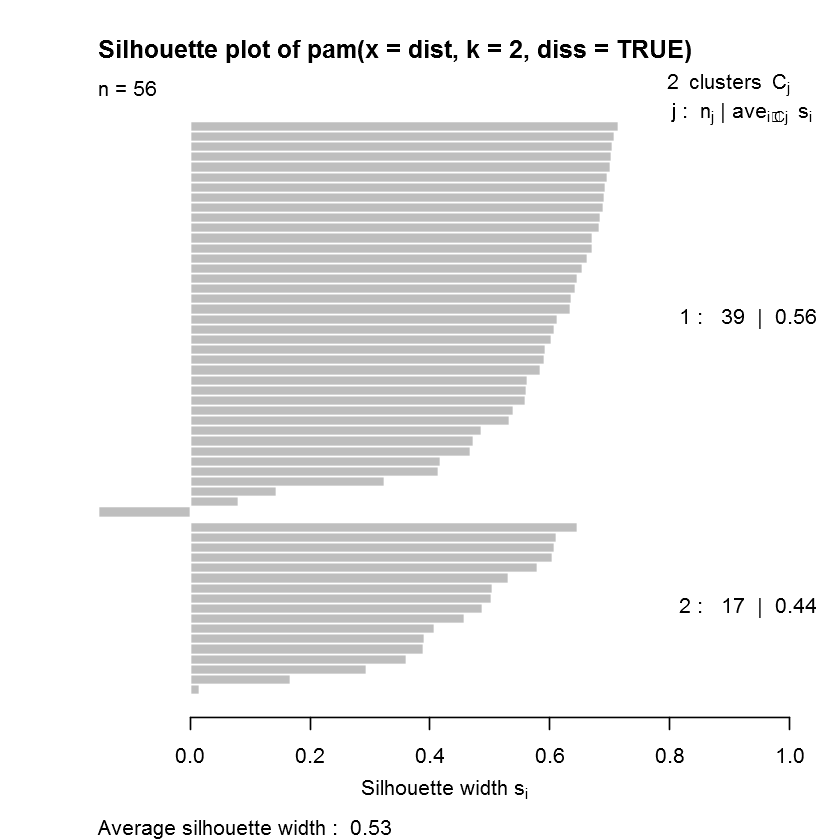

In [69]:
dist = diss(combined, METHOD='DTW')
clust(dist)